# Assignment 05 - Feature selection 

## Assignment description


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

## Loading the dataset 

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv('data/agaricus-lepiota.data')
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##  Habitat distributed between edibility vs non-edibility

<AxesSubplot:xlabel='habitat'>

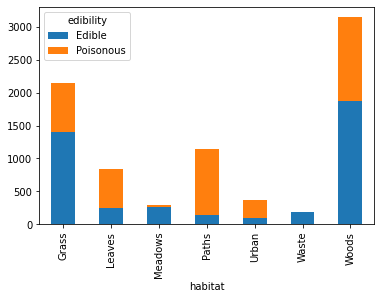

In [5]:
df_copy = df.copy()

# Renames values (so plot looks better)
df_copy['edibility'] = df_copy['edibility'].replace({'e' : 'Edible', 'p' : 'Poisonous'})
df_copy['habitat'] = df_copy['habitat'].replace({'d' : 'Woods', 
                                                 'g' : 'Grass', 
                                                 'l' : 'Leaves', 
                                                 'm' : 'Meadows', 
                                                 'p' : 'Paths', 
                                                 'u' : 'Urban', 
                                                 'w' : 'Waste'})

# Groups and plots data 
df_group = df_copy.groupby(['habitat', 'edibility'])['edibility'].count() 
df_group.unstack().plot(kind='bar', stacked=True)

## Features converted to dummy variables

In [6]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Visualization

In [7]:
import matplotlib.pyplot as plt

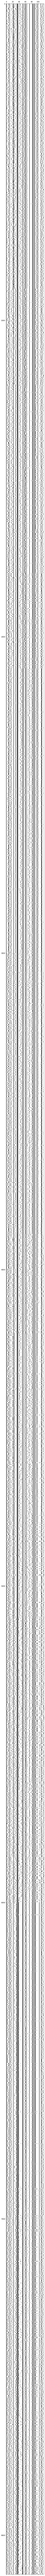

In [8]:
plt.figure(figsize=(300, 300))
plt.spy(df_dummy)